# ECON 622 Assignment 1
Yingxiang Li \
yingxiang.li@sauder.ubc.ca \
September 13, 2019

In [1]:
using Distributions
using Plots
using Statistics
using LinearAlgebra
using ForwardDiff

## Introductory Examples Exercise 7 

In [2]:
# First Passage Time

function first_passage_time(f, x_0, threshold, distribution, maxdraws = 200)
    # setup the algorithm
    ϵ = rand(distribution, maxdraws)
    x = similar(ϵ)
    x[1] = f(x_0) + rand(distribution, 1)[1]
    
    for i in 2 : maxdraws
        x[i] = f(x[i - 1]) + ϵ[i]
        if x[i] <= threshold # checks threshold
            return i # leaves function, returning draw number
        end
    end
    return Inf # if here, reached maxdraws
end

first_passage_time (generic function with 2 methods)

### Question 1

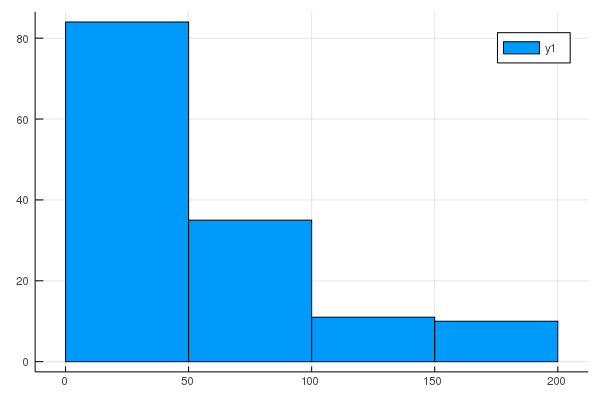

In [3]:
# define the function
α = [0.8, 1.0, 1.2]
f(x) = α[2] * x

# define the distribution of noise
μ = 0.0
σ = 0.2
distribution = Normal(μ, σ)

# define initial pointl, threshold and number of simulations
x_0 = 1.0
threshold = 0.0
maxdraws = 200
num_simulations = 100


# First Passage Times
T_0 = zeros(maxdraws)
@. T_0 = first_passage_time(f, x_0, threshold, distribution)

# Histogram
histogram(T_0)

### Question 2

In [4]:
# Expected First Passage Time

T_0_mean = similar(α)

for i in eachindex(α)
    f(x) = α[i] * x
    T_0 = zeros(maxdraws)
    @. T_0 = first_passage_time(f, x_0, threshold, distribution)
    T_0_mean[i] = mean(T_0)
end
T_0_mean

3-element Array{Float64,1}:
  10.435
 Inf    
 Inf    

# Introductory Examples Exercise 8(a)

In [5]:
# Newton's method to find the root of a given function with user-provided first-order derivative

function find_root_newton(f, f_prime, x_0, tolerance, maxiter)
    # setup the algorithm
    x_old = x_0
    normdiff = Inf
    iter = 1
    g(x) = x .- f(x) ./ f_prime(x)
    while normdiff > tolerance && iter <= maxiter
        x_new = g(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# define a map and parameters
f(x) = (x - 1) ^ 3 
f_prime(x) = 3 * (x - 1) ^ 2

maxiter = 1000
tolerance = 1.0E-7
x_0 = 0.5 # initial condition

v_star, normdiff, iter = find_root_newton(f, f_prime, x_0, tolerance, maxiter)
println("Root = $v_star, and |x^(n+1) - x^n| = $normdiff in $iter iterations")

Root = 0.999999847386336, and |x^(n+1) - x^n| = 7.63068319642457e-8 in 38 iterations


# Introductory Examples Exercise 8(b)

In [6]:
# Newton's method to find the root of a given function with auto-differentiation

function find_root_newton_new(f, x_0, tolerance, maxiter)
    # setup the algorithm
    x_old = x_0
    normdiff = Inf
    iter = 1
    D(f) = x -> ForwardDiff.derivative(f, x)
    f_prime = D(f)
    g(x) = x .- f(x) ./ f_prime(x)
    while normdiff > tolerance && iter <= maxiter
        x_new = g(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

v_star, normdiff, iter = find_root_newton_new(f, x_0, tolerance, maxiter)
println("Root = $v_star, and |x^(n+1) - x^n| = $normdiff in $iter iterations")

Root = 0.999999847386336, and |x^(n+1) - x^n| = 7.63068319642457e-8 in 38 iterations


# Excercise 1 in Introductory Examples

In [7]:
# User-defined factorial

function factorial2(n)
    for i in each(n)
        factorial = factorial * i
    end
    return factorial
end

factorial(5)

120

# Introductory Examples Excercise 2

In [8]:
# Binomial random variable

function binomial_rv(n, p)
    rv_uniform = rand(n) # n i.i.d uniform random variables ~ U[0,1]
    success = (rv_uniform .< p)
    return sum(success)
end

binomial_rv(1000, 0.5)

526

# Introductory Examples Excercise 3

In [9]:
# Monte Carlo to calculate π

function π_monte_carlo(n)
    count = 0
    
    center = ones(2) .* 0.5
    for i in 1:n
        rv = rand(2)       
        count = count + sum(norm(rv - center) < 0.5)
    end
    return count / n * 4
end

π_monte_carlo(100000)

3.14892

# Julia Essentials  Exercise 5

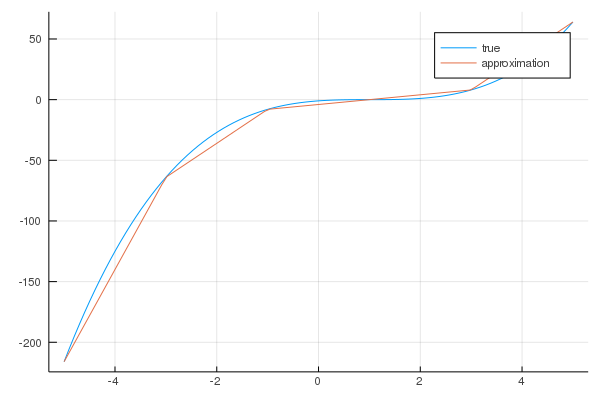

In [10]:
# Linear interpolation

function linapprox(f, nodes, x)
    @assert length(nodes) > 1
    
    a = nodes[1]
    b = nodes[end]
    step_length = length(nodes)

    u = a
    while u <= x
        u = u + step_length
    end
    d = u - step_length
    return f(d) + (f(u) - f(d)) * (x - d) / (u - d)
end


nodes = -5:10:5
f(x) = (x - 1) ^ 3
f_approx(x) = linapprox(f, nodes, x)

x_grid = range(-5, 5, length = 100)
y_vals = f.(x_grid)
y = f_approx.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")